In [ ]:
# Class Assignment 6(data visualizations)
# Author:   Himani Parikh - 1322085
# -   -   -   -   -   -   -   -   -   -   -   -   
# Date :    10/29/2022
# -   -   -   -   -   -   -   -   -   -   -   -   
# Description : 
# California website: data.ca.gov  download the crime stats for each are for the latest year published.  
# Create create the chart a second time, but this time use total crime per city instead of population.
# -   -   -   -   -   -   -   -   -   -   -   -   
# History
# Name      Date        Description
# scl       10/29/2022   Inital code draft for california population
# Scl       11/12/2022   Completed code for califonia crime
# Scl       11/12/2022   Getting wrong sum because of "," in each crime data
# TODO: 3

# Scl       11/22/2022   removed comma in each crime data and added comments
# TODO: 0
# -   -   -   -   -   -   -   -   -   -   -   -   

In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn

from google.colab import drive

In [ ]:
drive.mount('/content/drive')
location ='drive/MyDrive/Data/california_data_sets/'
list_of_files = os.listdir(location)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def f_readData(p, f):
  df = pd.read_csv(p+f)
  return df

In [ ]:
# Merge dataframes - latitude, offense, population and california_cities into single datafraame
def f_merge_dataframes(df1, df2, df3, df4,column):
  result = pd.merge(df1, df2, on=column).merge(df3, on=column).merge(df4, on=column)
  return result

In [ ]:
def f_legend():
  # make legend with dummy points
  for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
  plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='upper right', title='City Area');

In [ ]:
def f_plotGraph(title, lon, lat, value, area): 
  # FigureSize adjustment
  fig = plt.figure(figsize=(8, 6))
  # scatter city data, with color reflecting population/crime and size reflecting area
  plt.title(title)
  plt.scatter(lon, lat,
            c=np.log10(value), s=area,
            cmap='viridis', alpha=0.5)
  plt.xlabel('Longitude')
  plt.ylabel('Longitude')
  plt.axis(aspect='equal')
  plt.clim(3, 7)
  f_legend()
  #create colorbar and legend accroding to population and crime dataset
  if title == 'California Cities-Area and Population':
    plt.colorbar(label=r'$\log_{10}({\rm population })$')
  else:
    plt.colorbar(label=r'$\log_{10}({\rm crime})$')
  plt.show()

In [ ]:
# extract necessary columns from california_cities dataframes to create scatter plot for population
def f_california_population(df):
  lat = df['latd'].values
  lon = df['longd'].values
  city = df['city'].values
  population = df['population_total'].values
  area = df['area_total_km2'].values
  f_plotGraph('California Cities-Area and Population', lon, lat, population, area)

In [ ]:
# extract necessary columns from merged dataframes to create scatter plot for crime
def f_california_crime(df):
  latitude = df['latitude'].values
  longitude = df['longitude'].values
  cities = df['city'].values
  crime = df['total_crime'].values
  area = df['area_total_km2'].values
  f_plotGraph('California Cities-Area and Crime', longitude, latitude, crime, area)

In [ ]:
def main():
  # plot: California Cities-Area and Population
  cities = f_readData(location, 'california_cities.csv')
  f_california_population(cities)

  # plot: California Cities-Area and Crime
  cities_lat = f_readData(location, 'cal_cities_lat_long.csv')
  cities_lat.rename(columns = {'Name':'city'}, inplace = True)
  cities_lat= cities_lat.rename(columns=str.lower)

  cities_populations = f_readData(location, 'cal_populations_city.csv')
  cities_populations= cities_populations.rename(columns=str.lower)

  cities_offenses = f_readData(location, 'ca_offenses_by_city.csv')
  cities_offenses= cities_offenses.rename(columns=str.lower)

  offense = cities_offenses.dropna(axis=1)
  offense[offense.columns[2:]]=offense[offense.columns[2:]].replace(',','',regex=True).astype('int64')
  offense['total_crime']=offense.iloc[:,2:12].sum(axis=1)

  df = f_merge_dataframes(offense, cities_lat, cities_populations, cities, 'city')
  f_california_crime(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  # This is added back by InteractiveShellApp.init_path()


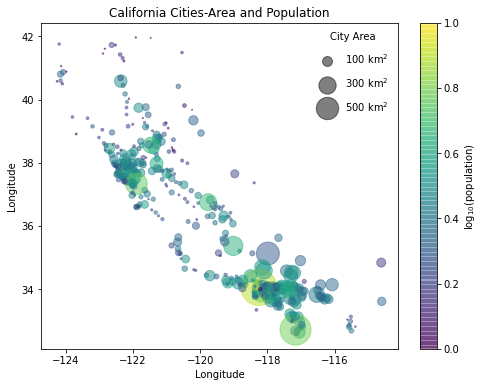

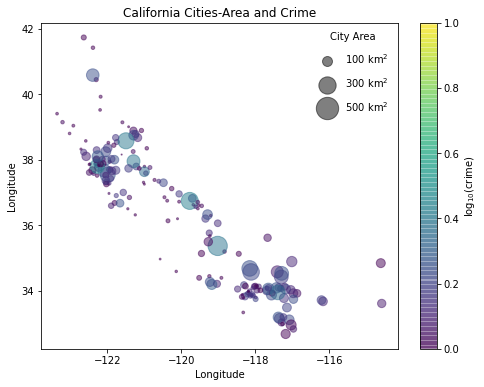

In [ ]:
main()